# AI Project: Recommender System for Netflix Movies and TV Show

## Globals and Imports

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

## Load the data

In [2]:
df = pd.read_csv('netflix_titles.csv')

## Data Exploration
- The data has 8807 rows and 12 columns

In [3]:
print(f"Dataset shape: {df.shape}")


Dataset shape: (8807, 12)


In [4]:
#print("\nFirst 5 rows of the dataset:")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# print("\nDataset Info:")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- We can see here that director, cast, country, data_added, rating, duration all have some null values

### Columns with missing values and their counts

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
# Fill missing values in key text columns with empty strings
# This prevents errors when we combine them later.
text_columns = ['director', 'cast', 'country', 'rating', 'duration']
for col in text_columns:
    df[col] = df[col].fillna('')

df['date_added'] = df['date_added'].fillna('')

# Verify that the missing values in these specific columns are filled
print("\nMissing values after cleaning key text columns:")
print(df[['director', 'cast', 'date_added', 'country', 'rating', 'duration']].isnull().sum())


Missing values after cleaning key text columns:
director      0
cast          0
date_added    0
country       0
rating        0
duration      0
dtype: int64


### Visual Analysis

C:\Users\nickp\AppData\Local\Temp\ipykernel_21064\874693359.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


Text(0, 0.5, 'Count')

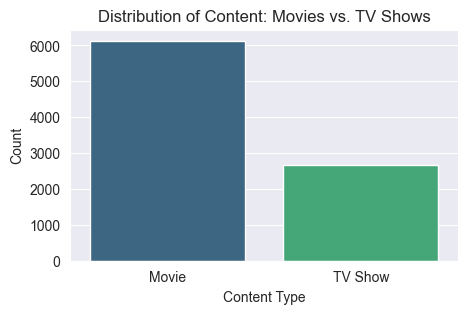

In [8]:
sns.set_style('darkgrid')

# Plot 1: Distribution of Content Type (Movie vs. TV Show)
plt.figure(figsize=(5, 3))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Content: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
#plt.savefig('content_type_distribution.png') # Saves the plot as an image

C:\Users\nickp\AppData\Local\Temp\ipykernel_21064\2630991642.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')


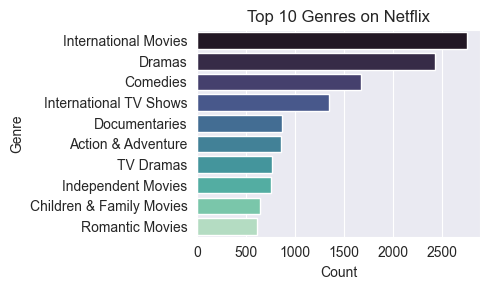

In [9]:
# Plot 2: Top 10 Genres
plt.figure(figsize=(5, 3))
# The 'listed_in' column has multiple genres separated by commas.
# We need to split them, count each one, and plot the most common ones.

#genre_data = df['listed_in'].str.split(', ').explode()
top_10_genres = df['listed_in'].str.split(', ').explode().value_counts().iloc[:10]

#sns.countplot(y=genre_data, order=genre_data.value_counts().iloc[:10].index, palette='mako')
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='mako')


plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.tight_layout()
#plt.savefig('top_10_genres.png') # Saves the plot as an image


## Recommendation Function

In [10]:
print("Creating a 'content' column by combining key text features...")

# For each movie, combine director, cast, genres, and description into a single string.
# We use .lower() to ensure all text is lowercase for consistency.
df['content'] = df['director'].str.lower() + ' ' + df['cast'].str.lower() + ' ' + df['listed_in'].str.lower() + ' ' + df['description'].str.lower()

print("'content' column created successfully.")
print("Example content for the first movie:")
print(df['content'].iloc[0])

Creating a 'content' column by combining key text features...
'content' column created successfully.
Example content for the first movie:
kirsten johnson  documentaries as her father nears the end of his life, filmmaker kirsten johnson stages his death in inventive and comical ways to help them both face the inevitable.


In [11]:
# Convert Text to Numbers (TF-IDF Vectorization) 
from sklearn.feature_extraction.text import TfidfVectorizer

print("\nVectorizing text data using TF-IDF...")

# Create a TF-IDF Vectorizer object.
# stop_words='english' removes common English words that don't add much meaning.
tfidf = TfidfVectorizer(stop_words='english')

# Apply the vectorizer to our 'content' column.
# This creates a large matrix where each row is a movie and each column is a word's TF-IDF score.
tfidf_matrix = tfidf.fit_transform(df['content'])

print("TF-IDF matrix created successfully.")
print(f"Shape of TF-IDF matrix: {tfidf_matrix.shape}")


Vectorizing text data using TF-IDF...
TF-IDF matrix created successfully.
Shape of TF-IDF matrix: (8807, 49941)


In [12]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between all movie vectors
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

print("Cosine similarity matrix created successfully.")
print(f"Shape of cosine similarity matrix: {cosine_sim.shape}")

Cosine similarity matrix created successfully.
Shape of cosine similarity matrix: (8807, 8807)


In [13]:
# print("\nBuilding the recommendation function...")

# Create a pandas Series of movie titles with their corresponding index
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    """
    This function takes a movie title and returns a DataFrame with the
    top 10 most similar movies and their similarity scores.
    """
    # Get the index of the movie that matches the title
    try:
        idx = indices[title]
    except KeyError:
        return f"Error: Movie '{title}' not found in the dataset."

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 5 most similar movies
    sim_scores = sim_scores[1:6]

    # Get the movie indices and their scores
    movie_indices = [i[0] for i in sim_scores]
    similarity_scores = [i[1] for i in sim_scores]

    # Create a new DataFrame to display the results
    recommendations_df = pd.DataFrame({
        'Title': df['title'].iloc[movie_indices],
        'Similarity Score': similarity_scores
    })
    
    return recommendations_df


# movie_title = "Jaws 2"
# recommendations = get_recommendations(movie_title)
# print(f"Recommendations for '{movie_title}':")
# print(recommendations)

# # print("\n---")

# # movie_title = "Forrest Gump"
# # recommendations = get_recommendations(movie_title)
# # print(f"Recommendations for '{movie_title}':")
# # print(recommendations)

# print("\n---")

# movie_title = "Jaws"
# recommendations = get_recommendations(movie_title)
# print(f"Recommendations for '{movie_title}':")
# print(recommendations)

movies = ["Indiana Jones and the Temple of Doom", "Kid Cosmic", "Blade Runner: The Final Cut", "Dick Johnson Is Dead", "Jailbirds New Orleans", "Django Unchained"]
for movie in movies:
    recommendations = get_recommendations(movie)
    print(f"Recommendations for '{movie}':")
    print(recommendations)


Recommendations for 'Indiana Jones and the Temple of Doom':
                                                  Title  Similarity Score
7072      Indiana Jones and the Raiders of the Lost Ark          0.185085
7071                 Indiana Jones and the Last Crusade          0.184125
7070  Indiana Jones and the Kingdom of the Crystal S...          0.172272
3343                                         Santa Girl          0.146170
7751                                            Platoon          0.111648
Recommendations for 'Kid Cosmic':
                                                  Title  Similarity Score
1213                                        Paradise PD          0.162728
40               He-Man and the Masters of the Universe          0.158301
4852                                       Trollhunters          0.144257
1074  Motu Patlu the Superheroes – Super Villains fr...          0.138693
3005        DreamWorks How to Train Your Dragon Legends          0.137807
Recommendations fo

## Quantitative Evaluation & Metrics

In [14]:
def calculate_genre_consistency(sample_size=5000):
    """
    Calculates the average genre consistency for a random sample of movies.
    """
    print("\n--- Calculating Genre Consistency ---")
    consistent_recommendations = 0
    total_recommendations = 0

    # Take a random sample of movies from the dataset
    sample_df = df.sample(n=sample_size, random_state=42)

    for index, row in sample_df.iterrows():
        title = row['title']
        original_genres = set(row['listed_in'].split(', '))

        # Get recommendations for the current movie
        recommendations = get_recommendations(title)

        if isinstance(recommendations, pd.DataFrame): # Check if recommendations were found
            # For each recommended movie, check if it shares a genre
            for rec_title in recommendations['Title']:
                rec_genres = set(df[df['title'] == rec_title]['listed_in'].iloc[0].split(', '))
                # Check for any intersection between the two sets of genres
                if original_genres.intersection(rec_genres):
                    consistent_recommendations += 1
                total_recommendations += 1

    consistency_score = (consistent_recommendations / total_recommendations) * 100
    print(f"Genre Consistency @10 for a sample of {sample_size} movies: {consistency_score:.2f}%")
    return consistency_score

# Run the evaluation
calculate_genre_consistency()


--- Calculating Genre Consistency ---
Genre Consistency @10 for a sample of 5000 movies: 68.69%


68.688

### Comparison

In [15]:
# --- Step 3.3: Comparison with Euclidean Distance ---
from sklearn.metrics.pairwise import euclidean_distances

print("\n--- Running Comparison with Euclidean Distance ---")

# Calculate the Euclidean distance between all movie vectors
euclidean_dist = euclidean_distances(tfidf_matrix)

print("Euclidean distance matrix created successfully.")

def get_recommendations_by_distance(title, distance_matrix):
    """
    This function takes a movie title and returns the top 10 closest movies
    based on a distance metric (where lower is better).
    """
    # Get the index of the movie that matches the title
    try:
        idx = indices[title]
    except KeyError:
        return f"Error: Movie '{title}' not found in the dataset."

    # Get the pairwise distance scores
    dist_scores = list(enumerate(distance_matrix[idx]))

    # Sort the movies based on the distance scores (ascending, since lower is better)
    dist_scores = sorted(dist_scores, key=lambda x: x[1], reverse=False)

    # Get the scores of the 10 closest movies (index 0 is the movie itself)
    dist_scores = dist_scores[1:11]

    # Get the movie indices and their scores
    movie_indices = [i[0] for i in dist_scores]
    distance_scores = [i[1] for i in dist_scores]

    # Create a new DataFrame to display the results
    recommendations_df = pd.DataFrame({
        'Title': df['title'].iloc[movie_indices],
        'Euclidean Distance': distance_scores
    })
    
    return recommendations_df

# Let's test the recommendation quality for 'Jaws' with this new model
print("\nRecommendations for 'Jaws' using Euclidean Distance:")
recommendations_euclidean = get_recommendations_by_distance("Jaws", distance_matrix=euclidean_dist)
print(recommendations_euclidean)


--- Running Comparison with Euclidean Distance ---
Euclidean distance matrix created successfully.

Recommendations for 'Jaws' using Euclidean Distance:
                                     Title  Euclidean Distance
42                                  Jaws 2            1.105224
44                       Jaws: The Revenge            1.206576
43                                  Jaws 3            1.341081
7073  Indiana Jones and the Temple of Doom            1.342816
7061                           In The Deep            1.353392
7071    Indiana Jones and the Last Crusade            1.354614
5930                          Mission Blue            1.356920
7308                               Lincoln            1.357106
279   Monster Hunter: Legends of the Guild            1.357454
8059                           Soul Surfer            1.358475


In [16]:
# --- MODIFIED EVALUATION FUNCTION ---
# This version lets us test different similarity models

def calculate_genre_consistency(model_name, cosine_sim_matrix, sample_size=50):
    """
    Calculates the average genre consistency for a random sample of movies
    using a provided cosine similarity matrix.
    """
    print(f"\n--- Calculating Genre Consistency for {model_name} ---")
    consistent_recommendations = 0
    total_recommendations = 0

    # Take a random sample of movies from the dataset
    # Using the same random_state ensures we test on the same sample each time
    sample_df = df.sample(n=sample_size, random_state=42)

    for index, row in sample_df.iterrows():
        title = row['title']
        original_genres = set(row['listed_in'].split(', '))

        # Get recommendations using the provided similarity matrix
        recommendations = get_recommendations(title, cosine_sim=cosine_sim_matrix)

        if isinstance(recommendations, pd.DataFrame): # Check if recommendations were found
            for rec_title in recommendations['Title']:
                # Handling potential errors if a recommended title isn't found (rare)
                if not df[df['title'] == rec_title].empty:
                    rec_genres = set(df[df['title'] == rec_title]['listed_in'].iloc[0].split(', '))
                    if original_genres.intersection(rec_genres):
                        consistent_recommendations += 1
                total_recommendations += 1

    if total_recommendations > 0:
        consistency_score = (consistent_recommendations / total_recommendations) * 100
        print(f"Result for {model_name}: {consistency_score:.2f}% Genre Consistency @10")
        return consistency_score
    else:
        print(f"No recommendations generated for the sample for {model_name}.")
        return 0.0

In [17]:
# --- COMPARISON EXPERIMENTS ---

# Import the new tools we'll need
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import euclidean_distances

# --- Comparison 1: Using CountVectorizer (Instead of TF-IDF) ---

print("\n\n--- Running Comparison 1: CountVectorizer vs. TF-IDF ---")

# 1. Create a CountVectorizer model and transform the content data
count_vec = CountVectorizer(stop_words='english')
count_matrix = count_vec.fit_transform(df['content'])

# 2. Compute the Cosine Similarity matrix for the CountVectorizer version
count_cosine_sim = cosine_similarity(count_matrix, count_matrix)
print("Created similarity matrix using CountVectorizer.")

# 3. Test the recommendation quality for 'Jaws' with this new model
print("\nRecommendations for 'Jaws' using CountVectorizer:")
recommendations_countvec = get_recommendations("Jaws", cosine_sim=count_cosine_sim)
print(recommendations_countvec)


# --- Comparison 2: Using Euclidean Distance (Instead of Cosine Similarity) ---

print("\n\n--- Running Comparison 2: Euclidean Distance vs. Cosine Similarity ---")

# 1. Calculate the Euclidean distance matrix using our ORIGINAL TF-IDF matrix
euclidean_dist = euclidean_distances(tfidf_matrix)
print("Euclidean distance matrix created successfully.")

# 2. We need a separate function for distance because lower is better
def get_recommendations_by_distance(title, distance_matrix):
    try:
        idx = indices[title]
    except KeyError:
        return f"Error: Movie '{title}' not found in the dataset."

    dist_scores = list(enumerate(distance_matrix[idx]))
    # Sort by distance in ascending order (lower is more similar)
    dist_scores = sorted(dist_scores, key=lambda x: x[1], reverse=False)
    dist_scores = dist_scores[1:11]
    movie_indices = [i[0] for i in dist_scores]

    return pd.DataFrame({
        'Title': df['title'].iloc[movie_indices],
        'Euclidean Distance': [i[1] for i in dist_scores]
    })

# 3. Test the recommendation quality for 'Jaws' with this new model
print("\nRecommendations for 'Jaws' using Euclidean Distance:")
recommendations_euclidean = get_recommendations_by_distance("Jaws", distance_matrix=euclidean_dist)
print(recommendations_euclidean)


# --- FINAL QUANTITATIVE COMPARISON ---
# Now, let's use our modified evaluation function to compare the scores

# Rerunning the original model for a clean comparison
calculate_genre_consistency("TF-IDF with Cosine Similarity", cosine_sim, sample_size=500)

# Running the CountVectorizer model
calculate_genre_consistency("CountVectorizer with Cosine Similarity", count_cosine_sim, sample_size=500)



--- Running Comparison 1: CountVectorizer vs. TF-IDF ---
Created similarity matrix using CountVectorizer.

Recommendations for 'Jaws' using CountVectorizer:
                                     Title  Similarity Score
42                                  Jaws 2          0.437042
44                       Jaws: The Revenge          0.310316
7071    Indiana Jones and the Last Crusade          0.195698
7073  Indiana Jones and the Temple of Doom          0.191663
579                           Midnight Run          0.172133


--- Running Comparison 2: Euclidean Distance vs. Cosine Similarity ---
Euclidean distance matrix created successfully.

Recommendations for 'Jaws' using Euclidean Distance:
                                     Title  Euclidean Distance
42                                  Jaws 2            1.105224
44                       Jaws: The Revenge            1.206576
43                                  Jaws 3            1.341081
7073  Indiana Jones and the Temple of Doom      

91.60000000000001